In [3]:
import astropy
from astropy.io import fits
from astropy.stats import sigma_clip
from astropy.visualization import ZScaleInterval

from pathlib import Path


from PIL import Image

from matplotlib import pyplot as plt

from torchvision.transforms.functional import to_pil_image

import torch
import json
import numpy as np
import glob



In [4]:
def zscale(img, contrast=0.15):
    interval = ZScaleInterval(contrast=contrast)
    min, max = interval.get_limits(img)

    img = (img - min) / (max - min)
    return img

In [5]:
def print_info(img, title):
    print(f'\n{title}')
    print(f'Min: {img.min()}')
    print(f'Max: {img.max()}')
    print(f'Mean: {img.mean()}')
    print(f'Std: {img.std()}')
    display(to_pil_image(img))
    plt.figure()
    plt.hist(img)

In [5]:
data_dir = Path('rg-dataset/data')
img_paths = []
for sample_dir in sorted(glob.glob(str(data_dir / '**/**/'))):
    img_dir = Path(sample_dir) / 'imgs'
    for img_path in sorted(glob.glob(str(img_dir / '*.fits'))):
        img_paths.append(img_path)

In [8]:
#image_path = img_paths[0]
image_path = "galaxy0001.fits"
img = fits.getdata(image_path)



Original
Min: -0.00021262149675749242
Max: 0.0012127283262088895
Mean: -1.6148351588926995e-06
Std: 0.000134545704310127


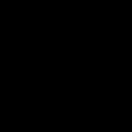

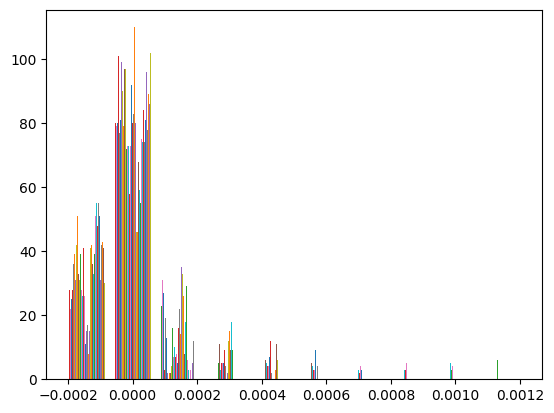

In [9]:
import torch
from torchvision.utils import save_image
from torchvision.transforms.functional import to_pil_image

# save_image(torch.from_numpy(img), 'tmp.png')
print_info(torch.from_numpy(img.astype(np.float64)), title='Original')


Zscale
Min: -0.00021262149675749242
Max: 0.0012127283262088895
Mean: -1.6148351588926995e-06
Std: 0.000134545704310127


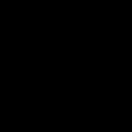

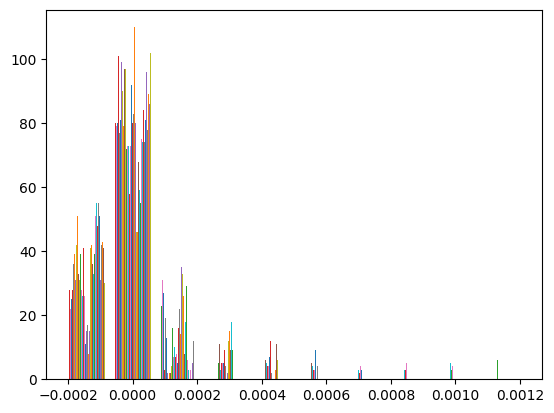

In [13]:
z_img = zscale(img, contrast=0.15)
print_info(torch.from_numpy(img.astype(np.float64)), title='Zscale')


Sigma Clip
Min: -0.011486051604151726
Max: 1.564753770828247
Mean: 0.2218581587076187
Std: 0.1487889587879181


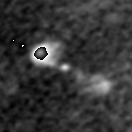

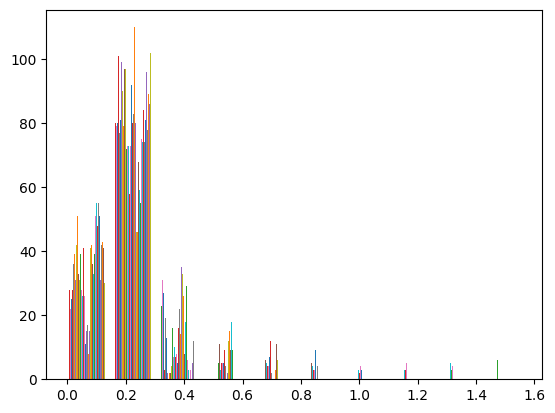

In [14]:
clipped = sigma_clip(z_img)
print_info(torch.from_numpy(clipped), title='Sigma Clip')

In [ ]:
norm_clipped = (clipped - clipped.min()) / (clipped.max() - clipped.min())
print_info(norm_clipped, title='Normalized Sigma Clipped')

NameError: name 'clipped' is not defined


TanH Activation
Min: -0.011485546827316284
Max: 0.9161872267723083
Mean: 0.21207450330257416
Std: 0.1170785203576088


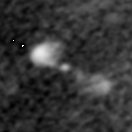

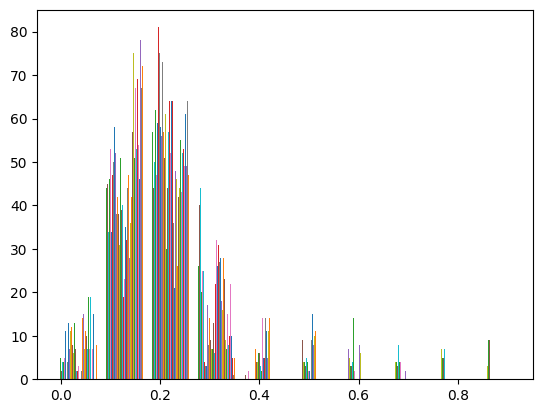

In [ ]:
tanh_activation = torch.tanh(torch.from_numpy(clipped))
# tanh_activation = torch.from_numpy(clipped)
print_info(tanh_activation, title='TanH Activation')


Normalized TanH Activation
Min: 0.0
Max: 1.0
Mean: 0.24099022150039673
Std: 0.12620671093463898


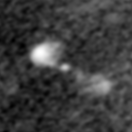

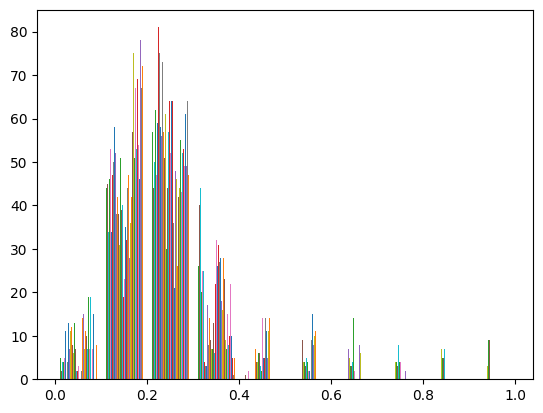

In [ ]:
norm_tanh_activation = (tanh_activation - tanh_activation.min()) / (tanh_activation.max() - tanh_activation.min())
print_info(norm_tanh_activation, title='Normalized TanH Activation')


PNG Converted
Min: 0
Max: 255
Mean: 56.12172865013774
Std: 34.935212250032706


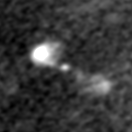

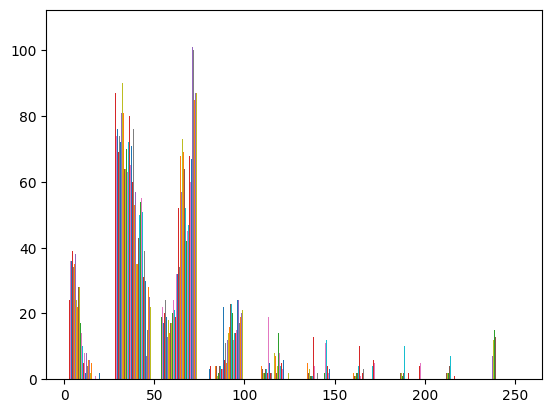

In [ ]:
ndarr = torch.from_numpy(clipped).unsqueeze(2).repeat(1,1,3).mul(255).add_(0.5).clamp_(0, 255).to("cpu", torch.uint8).numpy()
print_info(ndarr[:,:,0], title='PNG Converted')